# Linear discriminant analysis

## Discriminative vs. Generative classifiers/models
** *Based on Murphy 2022 (9.4) and Bishop 2006 (1.5.4)*  

**General problem:**

$
\begin{aligned}
p(y=c|x;\theta) = \frac{p(x|y=c;\theta)p(y=c;\theta)}{\sum_{c'}^{}p(x|y=c';\theta)}
\end{aligned}
$

**Inference and decision**

Classification problems can be broken into two separate stages:

1. Inference stage: We use training data to learn a model for $p(y=c|x)$
2. Decision stage: We use the posterior probabilities to make optimal class asignements

An alternative possibility is to solve both problems together and simply learn a function that maps inputes $x$ directly into decisions. Such a fuction is called a disciminant function. 

## Generative classifiers

$
\begin{aligned}
p(x,y) = p(y)p(x|y)
\end{aligned}
$

This is a generative classifier because it specifies a way to generate the features x for each class c by sampling from $p(x|y=c;\theta)$. It can generate examples $x$ from each class $y$. Approaches that exlicitly or implicitly model the distribution of inputs as well as outputs are called generative models, because by sampling from them it is possible to generate synthetic data points in the input space. 

**Pros:**
- Often easy to fit (e.g., naive Bayes).
- Allows for the marginal density of the data $p(x)$ to be estimated, which is useful for detecting new data points that have low probability under the model (outliers or novelty). 
- Easy to handle missing data
- Can handle unlabelled training data in a semi-supervised setting in which only some of the data is labelled.   

**Cons:**
- The most demanding because it involves finding the joint distribution over features and classes $p(x,C)$. This is dificult when x is high dimensional, and thus requires a large training set. Class priors $p(C)$ are also required, but they can easily be estimatesd from the fractions of the training set. 
- Can be a waste of computational resources to compute the joint distribution $p(x,C)$ when we just need posterior probabilities fro clasisfication. Class-conditional densities may contain a lot of structure that has little effect on the posterior probabilities. 


**Examples of Generative Models**
- Naive Bayes
- Bayesian networks
- Markov random fields
- Hidden Markov Models (HMMs)
- Latent Dirichlet Allocation (LDA)
- Generative Adversarial Networks (GANs)
- Autoregressive Model




## Discriminative classifiers

$
\begin{aligned}
p(y|x)
\end{aligned}
$

Approaches that directly model the posterior probabilities $p(y=c|x;\theta)$. Can be used only for classification. 

These models first sovle the inference problem of computing the posterior, and then use decision theory to asign each new $x$ to one of the classes. 

**Pros:** 
- Often more accurate than generative classifiers. The reason is that the conditional distribution is often much simpler than the joint (see the example below)
- Can handle preprocessed data (e.g., polynomial expanstion of the input features). This is harder with generative models. 



**Examples of Discriminative Models**
- Logistic regression
- Support vector machines (SVMs)
- Traditional neural networks
- Nearest neighbor
- Conditional Random Fields (CRFs)
- Decision Trees and Random Forest

## Example: generative vs. discriminative classifiers

The conditional distribution $p(y|x)$ is often much simpler than the joint distribution $p(y,x)$. Thus, discirminative models do not need to waste effort modeling the distribution of the input features. 

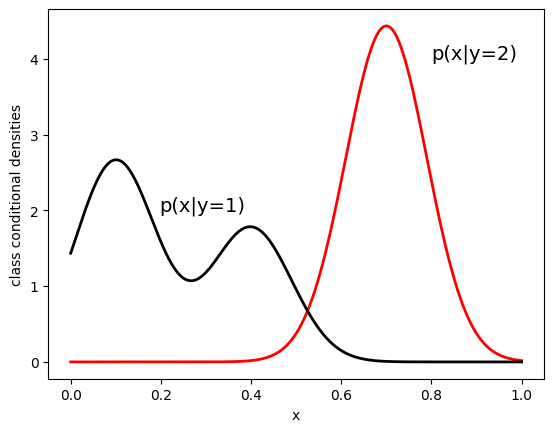

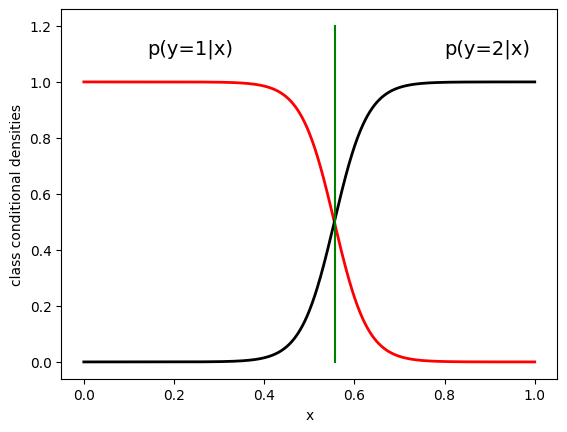

In [5]:
import numpy as np
from numpy.random import laplace
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

domain = np.arange(0, 1.001, 0.001)

def f1(x):
    return multivariate_normal.pdf(x, 0.7, 0.09**2)

def f2(x):
    return 0.6 * multivariate_normal.pdf(x, 0.1, 0.09**2) + 0.4 * multivariate_normal.pdf(x, 0.4, 0.09**2)

plt.plot(domain, f1(domain), "r-", linewidth=2)
plt.plot(domain, f2(domain), "k-", linewidth=2)
plt.xlabel("x")
plt.ylabel("class conditional densities")
plt.annotate("p(x|y=1)", (0.196, 2), fontsize=14)
plt.annotate("p(x|y=2)", (0.8, 4), fontsize=14)
plt.show()

domain = np.arange(0, 1.001, 0.001)

def f1(x):
    return 1 / (1 + np.exp((27 * x - 15)))

def f2(x):
    return 1 / (1 + np.exp((-27 * x + 15)))

plt.plot(domain, f1(domain), "-r", linewidth=2)
plt.plot(domain, f2(domain), "-k", linewidth=2)
plt.xlabel("x")
plt.ylabel("class conditional densities")
plt.plot([0.556, 0.556], [0, 1.2], "-g")
plt.annotate("p(y=1|x)", (0.14, 1.1), fontsize=14)
plt.annotate("p(y=2|x)", (0.8, 1.1), fontsize=14)
plt.show()

## Linear discriminant analysis

This is a generative model (confusing naming).   

If we choose the class conditional densities in a *special way*, we will see that the resulting posterior over classses is a linear function of $x$: log $p(y=c|x;\theta) = w^Tx + const$. Where $w$ is derived from $\theta$. This is why the method is called linear discriminant analysis.


### Gaussian discriminant analysis

#### Quadratic decision boundaries

- A generative classifer 
- Class conditional densities are multivariate Gaussian distributions:

$
\begin{aligned}
p(x|y=c;\theta) = \mathcal{N}(x|\mu_{c},\Sigma_{c})
\end{aligned}
$

Thus the posterior is:

$
\begin{aligned}
p(y=c|x;\theta) \propto \pi_{c}\mathcal{N}(x|\mu_{c},\Sigma_{c})
\end{aligned}
$

$
\begin{aligned}
\pi_{c}=p(y=c)
\end{aligned}
$  
(we drop the normalization costant in the denominator of the posterior becuase it's independent of c)

Develop the posterior:

$
\begin{aligned}
p(y=c|x;\theta) 
&\propto\pi_{c}\mathcal{N}(x|\mu_{c},\Sigma_{c}) \\
&\propto\pi_{c}\frac{e^{-\frac{1}{2}(x-\mu_{c})^T\Sigma_{c}^{-1}(x-\mu_{c})}}{(2\pi)^{k}|\Sigma_{c}|} \\
\end{aligned}
$

Take the log of the posterior:

$
\begin{aligned}
\textrm{log}\,p(y=c|x;\theta)
&=\textrm{log}\,\pi_{c} -\frac{1}{2}\textrm{log}\,(2\pi|\Sigma_{c}|) -\frac{1}{2}(x-\mu_{c})^T\Sigma_{c}^{-1}(x-\mu_{c}) + const \\
\end{aligned}
$

This is a **discriminant function**. The decision bnoundary between any two classes will be a quadtratic function of $x$. This is known as **quadratic discriminant analysis**.

#### Linear decision boundaries

Special case of Gaussian discriminant analysis where the covariance matrices are shaared across classes $\Sigma_{c}=\Sigma$. 

We can thus simplyfy the posterior:

$
\begin{aligned}
\textrm{log}\,p(y=c|x;\theta)
&=\textrm{log}\,\pi_{c} -\frac{1}{2}\textrm{log}\,(2\pi|\Sigma_{c}|) -\frac{1}{2}(x-\mu_{c})^T\Sigma_{c}^{-1}(x-\mu_{c}) + const \\
&=\textrm{log}\,\pi_{c} -\frac{1}{2}(x-\mu_{c})^T\Sigma^{-1}(x-\mu_{c}) + const \\
&=...\\
&=\gamma_{c} + x^T\beta_{c} + const \\
\end{aligned}
$

#### The connection between LDA and logistic regression


Fairly straigth forward --> look up in the book p. 319

#### Model fitting


$
\begin{aligned}
p(D|\theta) = \prod_{n=1}^{N}Cat(y_{n})|\pi \prod_{c=1}^{C}\mathcal{N}(x_{n}|\mu_{c},\Sigma_{c})^{I(y_{n}=c)}
\end{aligned}
$

$
\begin{aligned}
\textrm{log}\,p(D|\theta) = \left[\sum_{n=1}^{N}\sum_{c=1}^{C}\mathbb{I}(y_{n}=c)\textrm{log}\,\pi_{c}\right]  + \sum_{c=1}^{C}\left[\sum_{n:y_{n}=c}\textrm{log}\,\mathcal{N}(x_{n}|\mu_{c},\Sigma_{c})\right]  
\end{aligned}
$

We can optimize for $\pi$ and the $(\mu_{c},\Sigma_{c})$ separately

Use section 4.2.4 (MLE for the categorical distribution) to see that the MLE for the class prior is: $ \hat{\pi}_{c} = \frac{N_{c}}{N}$.

Use section 4.2.6 (MLE for the MVN) to derive the MLEs for Gaussians:

$
\begin{aligned}
\hat{\mu}_{c} = \frac{1}{N_{c}}\sum_{n:y_{n}=c}x_{n} 
\end{aligned}
$

$
\begin{aligned}
\hat{\Sigma}_{c} = \frac{1}{N_{c}}\sum_{n:y_{n}=c}(x_{n}-\hat{\mu}_{c})(x_{n}-\hat{\mu}_{c})^T
\end{aligned}
$

The MLE for $\hat{\Sigma}_{c}$ can easily overfit in $N_{c}$ is small compared to $D$. To avoid this, can force $\Sigma_{c}=\Sigma$ and get linear decision boundries. This allows for pooling across classes and results in a more reliable parameter estimate. Otherwise, we can force $\Sima_{c}$ to be diagonal, which reduces the number of parameters, but doesn't allow fo capture correlations between features (this is naive Bayes).



##### Model fitting example

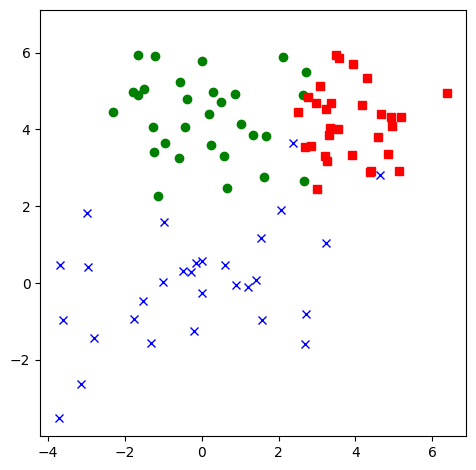

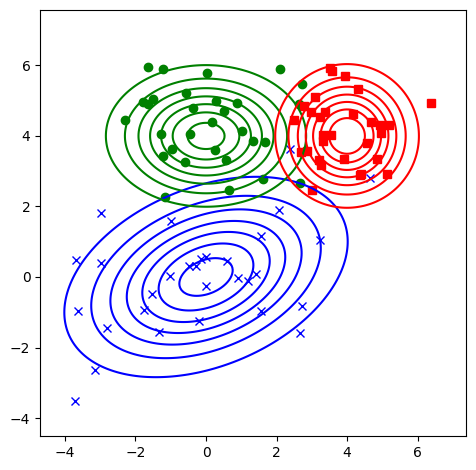

C:\Users\igrahek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\igrahek\AppData\Local\Temp\ipykernel_18392\2546999341.py:88: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, z_p[:, j].reshape(ngrid, ngrid), [0.5], lw=3, colors="k")


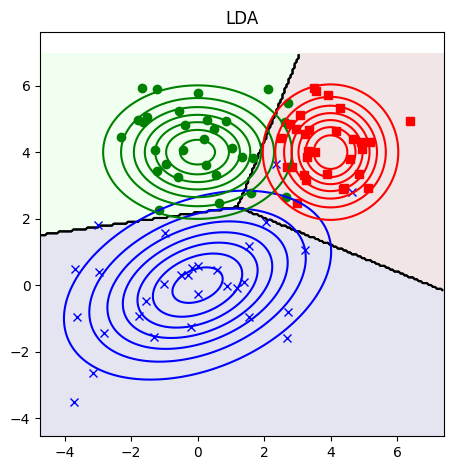

C:\Users\igrahek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\igrahek\AppData\Local\Temp\ipykernel_18392\2546999341.py:88: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, z_p[:, j].reshape(ngrid, ngrid), [0.5], lw=3, colors="k")


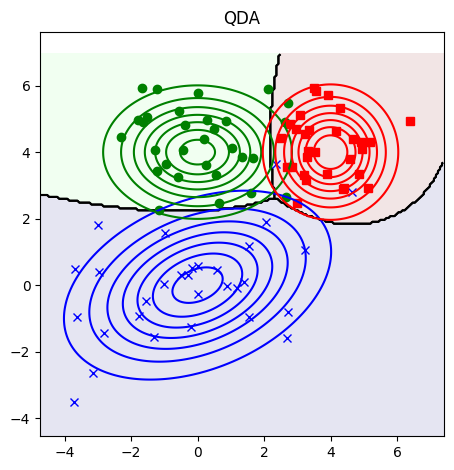

In [2]:
# Gaussian discriminant analysis in 2d
# Author: Duane Rich, heavily modified by Kevin Murphy
# Based on matlab code by Kevin Murphy
# https://github.com/probml/pmtk3/blob/master/demos/discrimAnalysisDboundariesDemo.m


import numpy as np
import matplotlib.pyplot as plt
import os

try:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.preprocessing import OneHotEncoder


def mvn2d(x, y, u, sigma):
    xx, yy = np.meshgrid(x, y)
    xy = np.c_[xx.ravel(), yy.ravel()]
    sigma_inv = np.linalg.inv(sigma)
    z = np.dot((xy - u), sigma_inv)
    z = np.sum(z * (xy - u), axis=1)
    z = np.exp(-0.5 * z)
    z = z / (2 * np.pi * np.linalg.det(sigma) ** 0.5)
    return z.reshape(xx.shape)


# Each model specifies the means and covariances.
# If the covariances are equal across classes, dboundarioes
# will be linear even if we use QDA


def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


model1 = ([[1.5, 1.5], [-1.5, -1.5]], [np.eye(2)] * 2)

model2 = ([[1.5, 1.5], [-1.5, -1.5]], [[[1.5, 0], [0, 1]], np.eye(2) * 0.7])

model3 = ([[0, 0], [0, 5], [5, 5]], [np.eye(2)] * 3)

Sigma1 = np.array([[4, 1], [1, 2]])
Sigma2 = np.array([[2, 0], [0, 1]])
Sigma3 = np.eye(2)

model4 = ([[0, 0], [0, 4], [4, 4]], [Sigma1, Sigma2, Sigma3])

models = [model1, model2, model3, model4]
models = [model4]

ngrid = 200
n_samples = 30  # number of each class samples
model_names = ("LDA", "QDA")
np.random.seed(0)


def make_data(u, sigma):
    # generate random points
    x = []  # store sample points
    labels = []  # store class labels
    nclasses = len(u)  # means
    for i in range(nclasses):
        x.append(np.random.multivariate_normal(u[i], sigma[i], n_samples))
        labels.append([i] * n_samples)
    return x, labels


def make_grid(x):
    points = np.vstack(x)
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    x_range = np.linspace(x_min - 1, x_max + 1, ngrid)
    y_range = np.linspace(y_min - 1, y_max + 1, ngrid)
    xx, yy = np.meshgrid(x_range, y_range)
    return xx, yy, x_range, y_range


def plot_dboundaries(xx, yy, z, z_p):
    plt.pcolormesh(xx, yy, z, alpha=0.1)
    plt.jet()
    nclasses = z_p.shape[1]
    for j in range(nclasses):
        plt.contour(xx, yy, z_p[:, j].reshape(ngrid, ngrid), [0.5], lw=3, colors="k")


def plot_points(x):
    c = "bgr"
    m = "xos"
    for i, point in enumerate(x):
        plt.plot(point[:, 0], point[:, 1], c[i] + m[i])


def plot_contours(xx, yy, x_range, y_range, u, sigma):
    nclasses = len(u)
    c = "bgr"
    m = "xos"
    for i in range(nclasses):
        prob = mvn2d(x_range, y_range, u[i], sigma[i])
        cs = plt.contour(xx, yy, prob, colors=c[i])


def make_one_hot(yhat):
    yy = yhat.reshape(-1, 1)  # make 2d
    enc = OneHotEncoder(sparse=False)
    Y = enc.fit_transform(yy)
    return Y


for u, sigma in models:
    x, labels = make_data(u, sigma)
    xx, yy, x_range, y_range = make_grid(x)
    X = np.vstack(x)
    Y = np.hstack(labels)

    plt.figure()
    plot_points(x)
    plt.axis("square")
    plt.tight_layout()

    plt.show()

    plt.figure()
    plot_points(x)
    plot_contours(xx, yy, x_range, y_range, u, sigma)
    plt.axis("square")
    plt.tight_layout()
 
    plt.show()

    for k, clf in enumerate((LDA(), QDA())):
        clf.fit(X, Y)
        z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        z = z.reshape(ngrid, ngrid)
        z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        yhat = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Yhat = make_one_hot(yhat)

        plt.figure()
        # plot_dboundaries(xx, yy, z, z_p)
        plot_dboundaries(xx, yy, z, Yhat)
        plot_points(x)
        plot_contours(xx, yy, x_range, y_range, u, sigma)
        plt.title(model_names[k])
        plt.axis("square")
        plt.tight_layout()

        plt.show()